In [1]:
# import packages and suppress warnings

suppressPackageStartupMessages(library(pathfindR))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(biomaRt))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
# define directories

pathfindR_dir = "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/DNA_REPi/Expression_CNA/pathfindR/GDSC_PDX_TCGA_Second_Strategy/"
gdsc_dir = "/Volumes/Expansion/Thesis Work/Supplementary Files/GDSC/"
exp_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/"

In [3]:
# create directory for pathfindR analysis and change to that directory

dir.create(pathfindR_dir, showWarnings = FALSE)
setwd(pathfindR_dir)
getwd()

[1] "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/DNA_REPi/Expression_CNA/pathfindR/GDSC_PDX_TCGA_Second_Strategy"

In [4]:
# read DEGs table of gemcitabine (DNA_REPi)

input_df <- read.delim(paste0(pathfindR_dir, "/GDSC_Expression_CNA_Filtered_DEGs_Table_DNA_REPi_Gemcitabine.tsv"))
input_df <- input_df[,c("symbol","logFC","P.Value")]

head(input_df, 3)

,symbol,logFC,P.Value
,<chr>,<dbl>,<dbl>
1,SLFN11,-1.4963416,3.626992e-07
2,ESRP1,1.6844946,5.984221e-05
3,HS3ST4,-0.4940198,3.982516e-04


## Testing input

The input looks OK

## Processing input. Converting gene symbols,
          if necessary (and if human gene symbols provided)

Number of genes provided in input: 772

Number of genes in input after p-value filtering: 73



Could not find any interactions for 42 (57.53%) genes in the PIN

Final number of genes in input: 31

## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations

## Annotating involved genes and visualizing enriched terms

## Creating HTML report



processing file: results.Rmd



1/3        
2/3 [setup]
3/3        


output file: results.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS results.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc13c957ea7fc98.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmphzcQSV/rmarkdown-str13c9575e8acc9.html 



Output created: results.html



processing file: enriched_terms.Rmd



1/4        
2/4 [setup]
3/4        
4/4 [table]


output file: enriched_terms.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS enriched_terms.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc13c9527a24e5d.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmphzcQSV/rmarkdown-str13c9563715d44.html 


Output created: enriched_terms.html



processing file: conversion_table.Rmd



1/6                              
2/6 [setup]                      
3/6                              
4/6 [converted_tbl, table1]      
5/6                              
6/6 [gene_wo_interaction, table2]


output file: conversion_table.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS conversion_table.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc13c9579e3fd64.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmphzcQSV/rmarkdown-str13c95301808b6.htm


Output created: conversion_table.html

Plotting the enrichment bubble chart

Found 28 enriched terms



You may run:


- cluster_enriched_terms() for clustering enriched terms


- visualize_terms() for visualizing enriched term diagrams





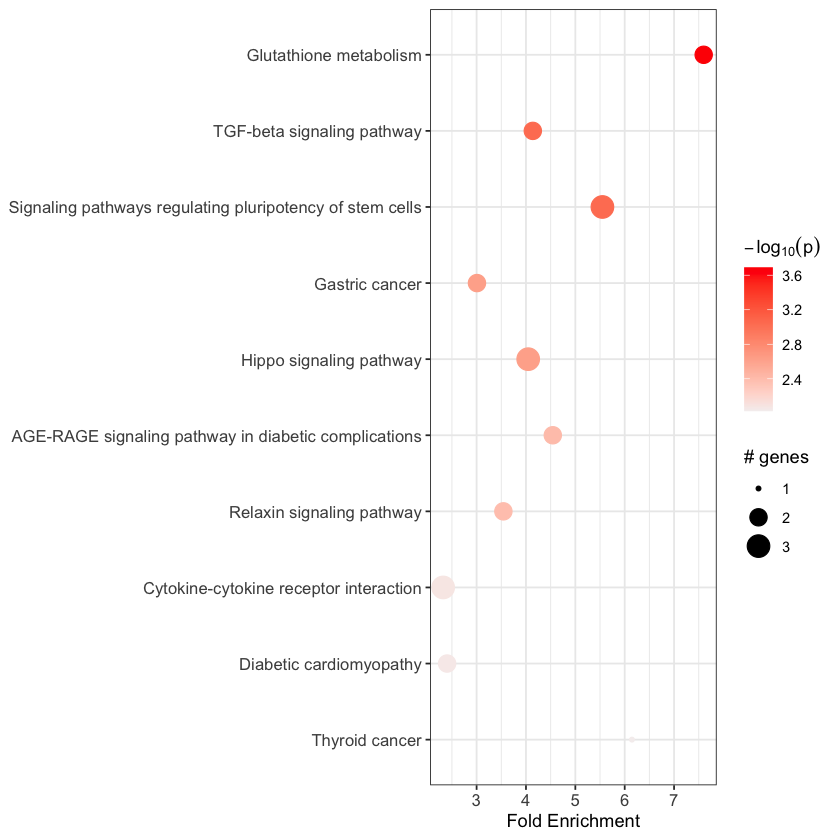

In [5]:
# run pathfindR

output_df <- run_pathfindR(input_df, 
                            output_dir = paste(pathfindR_dir,"KEGG_Gemcitabine",sep="/"),
                            pin_name_path = "KEGG",
                            adj_method = "fdr",
                            enrichment_threshold = 0.05,
                            min_gset_size = 5,
                            max_gset_size = 500,
                            iterations = 25,
                            gene_sets= "KEGG")

In [6]:
# show pathfindR output

knitr::kable(head(output_df, 5))



|ID       |Term_Description                                         | Fold_Enrichment| occurrence|   support|  lowest_p| highest_p|Up_regulated      |Down_regulated |
|:--------|:--------------------------------------------------------|---------------:|----------:|---------:|---------:|---------:|:-----------------|:--------------|
|hsa00480 |Glutathione metabolism                                   |        7.600000|         25| 0.0769231| 0.0002044| 0.0002044|MGST2             |GPX8           |
|hsa04350 |TGF-beta signaling pathway                               |        4.138614|         25| 0.0769231| 0.0009121| 0.0009121|INHBB, BMP4       |               |
|hsa04550 |Signaling pathways regulating pluripotency of stem cells |        5.548673|         25| 0.1538462| 0.0009121| 0.0009121|FZD6, INHBB, BMP4 |               |
|hsa05226 |Gastric cancer                                           |        3.007194|         25| 0.0769231| 0.0023712| 0.0023712|FZD6, CDH1        |             

Plotting the enrichment bubble chart



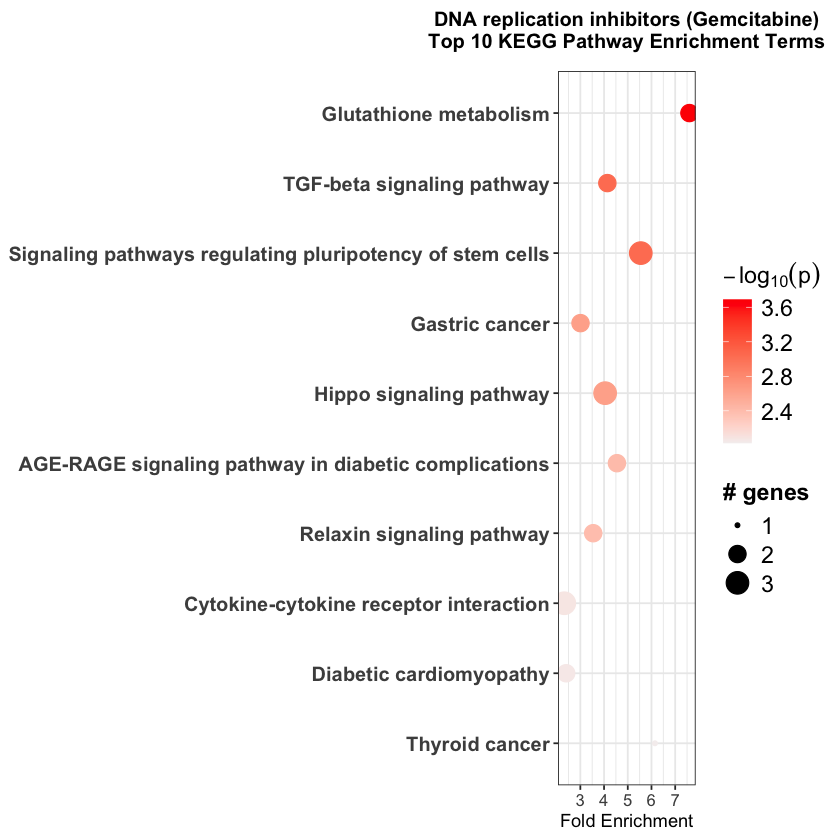

In [7]:
# plot fold enrichment results

fold_enrichment_figure <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
ggplot2::theme(
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5),           
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
    legend.title = ggplot2::element_text(size = 14, face = "bold"),             
    legend.text = ggplot2::element_text(size = 14),                             
    #legend.key.size = ggplot2::unit(1, "cm")  
) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8),  # Custom x-axis tick values
    labels = c("2", "3", "4", "5", "6", "7", "8")  # Optional: Custom labels
)

# Save the plot as a PDF file
ggplot2::ggsave(
  filename = paste0(pathfindR_dir, "/KEGG_Gemcitabine/Fold Enrichment (n = 10).pdf"),
  plot = fold_enrichment_figure,             
  width = 10,  
  height = 6   
)

# Display the plot
print(fold_enrichment_figure)

In [8]:
# cluster enriched terms

pathfindR_output_clustered <- cluster_enriched_terms(output_df, 
                                                     plot_dend = FALSE, 
                                                     plot_clusters_graph = FALSE)

knitr::kable(head(pathfindR_output_clustered, 2))

The maximum average silhouette width was 0.63 for k = 9 







|   |ID       |Term_Description                      | Fold_Enrichment| occurrence|   support|  lowest_p| highest_p|Up_regulated |Down_regulated | Cluster|Status         |
|:--|:--------|:-------------------------------------|---------------:|----------:|---------:|---------:|---------:|:------------|:--------------|-------:|:--------------|
|1  |hsa00480 |Glutathione metabolism                |            7.60|         25| 0.0769231| 0.0002044| 0.0002044|MGST2        |GPX8           |       1|Representative |
|21 |hsa05204 |Chemical carcinogenesis - DNA adducts |            4.18|         25| 0.0769231| 0.0237093| 0.0237093|MGST2        |               |       1|Member         |

In [9]:
## The representative terms

head(knitr::kable(pathfindR_output_clustered[pathfindR_output_clustered$Status == "Representative", ]), 5)

[1] "|   |ID       |Term_Description                                     | Fold_Enrichment| occurrence|   support|  lowest_p| highest_p|Up_regulated                    |Down_regulated | Cluster|Status         |"
[2] "|:--|:--------|:----------------------------------------------------|---------------:|----------:|---------:|---------:|---------:|:-------------------------------|:--------------|-------:|:--------------|"
[3] "|1  |hsa00480 |Glutathione metabolism                               |        7.600000|         25| 0.0769231| 0.0002044| 0.0002044|MGST2                           |GPX8           |       1|Representative |"
[4] "|2  |hsa04350 |TGF-beta signaling pathway                           |        4.138614|         25| 0.0769231| 0.0009121| 0.0009121|INHBB, BMP4                     |               |       2|Representative |"
[5] "|4  |hsa05226 |Gastric cancer                                       |        3.007194|         25| 0.0769231| 0.0023712| 0.0023712|FZD6, CDH1                      |               |       3|Representative |"

In [10]:
# show output of pathfindR clustered table

head(pathfindR_output_clustered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa00480,Glutathione metabolism,7.600000,25,0.07692308,0.0002044016,0.0002044016,MGST2,GPX8,1,Representative
21,hsa05204,Chemical carcinogenesis - DNA adducts,4.180000,25,0.07692308,0.0237092700,0.0237092700,MGST2,,1,Member
22,hsa00982,Drug metabolism - cytochrome P450,3.603448,25,0.07692308,0.0237092700,0.0237092700,MGST2,,1,Member


In [11]:
# plot only selected clusters for better visualization

selected_clusters <- subset(pathfindR_output_clustered, Cluster %in% 1:5)
gg_list <- enrichment_chart(selected_clusters, plot_by_cluster = TRUE)  

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Clustered Bubble Plot.pdf",sep="/"),
  gg_list,             
  width = 10,                                   
  height = 6                                    
) 

Plotting the enrichment bubble chart



# GDSC ###

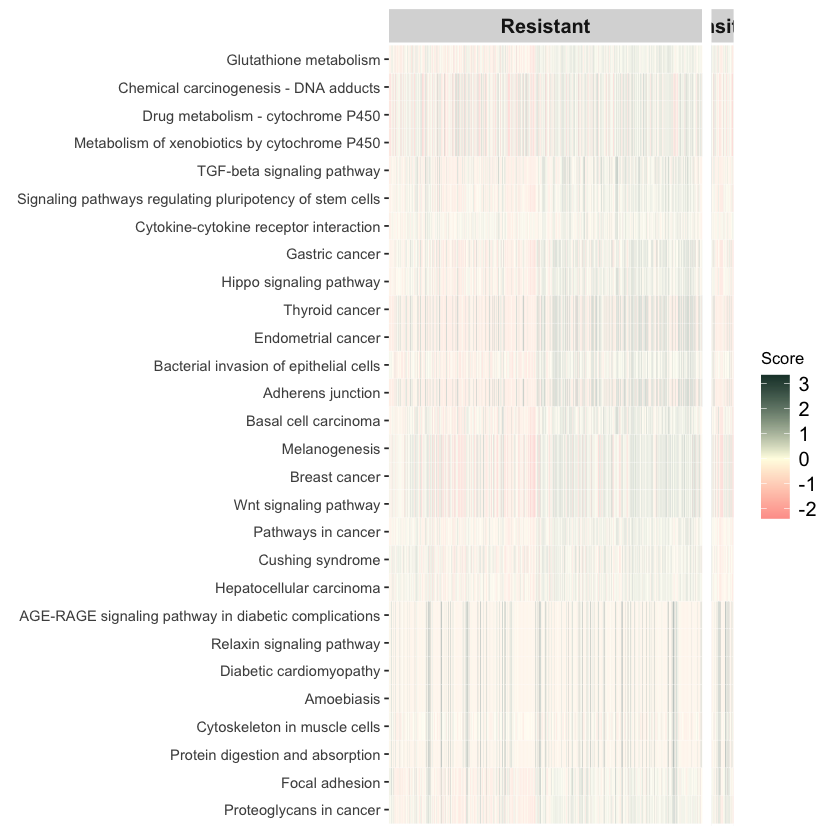

In [12]:
# read GDSC expression matrix and sample files

gdsc_experiment_matrix <- read.delim(paste(pathfindR_dir, "GDSC_Experiment_Matrix_DNA_REPi_Gemcitabine_Second_Strategy.tsv", sep = "/"))
colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)] <- sub("^X", "", colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)])
rownames(gdsc_experiment_matrix) <- gdsc_experiment_matrix$symbol
gdsc_experiment_matrix <- gdsc_experiment_matrix[,-1]
gdsc_experiment_matrix <- as.matrix(gdsc_experiment_matrix)
colnames(gdsc_experiment_matrix) <- as.integer(colnames(gdsc_experiment_matrix))

gdsc_cases_data <- read.delim(paste(pathfindR_dir, "GDSC_DNA_REPi_Gemcitabine_Samples_Second_Strategy.tsv", sep ="/"))

filter <- (gdsc_cases_data["Response"] == 0)
cases <- as.character(gdsc_cases_data[filter, "Sample"])

score_matrix <- score_terms(
  enrichment_table = pathfindR_output_clustered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE, 
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", # default = "green"
  mid = "#fffde4", # default = "black"
  high = "#1f4037" # default = "red"
)

In [13]:
# plot scores per sample 

hmap <- plot_scores(score_matrix,
                    cases = cases,
                    label_samples = FALSE,
                    case_title = "Resistant", 
                    control_title = "Sensitive", 
                    low = "#f7797d", # default = "green"
                    mid = "#fffde4", # default = "black"
                    high = "#1f4037" # default = "red"
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Scores per Sample Plot (GDSC).pdf",sep="/"),
  hmap,             
  width = 25,                                    
  height = 8                                    
) 

In [14]:
# select some critical enriched terms and export table

terms_significant <- c("Glutathione metabolism",
                       "TGF-beta signaling pathway",
                       "Signaling pathways regulating pluripotency of stem cells",
                       "Hippo signaling pathway",
                       "Cytokine-cytokine receptor interaction",
                       "Cytoskeleton in muscle cells",
                       "Protein digestion and absorption",
                       "Adherens junction",
                       "Chemical carcinogenesis - DNA adducts",
                       "Drug metabolism - cytochrome P450",
                       "Metabolism of xenobiotics by cytochrome P450",
                       "Melanogenesis",
                       "Wnt signaling pathway")
save_filtered <- pathfindR_output_clustered[pathfindR_output_clustered$Term_Description %in% terms_significant,]
write.table(save_filtered,
            paste0(pathfindR_dir, "KEGG_Gemcitabine/GDSC_Expression_CNA_DNA_REPi_Gemcitabine_Selected_Significant_Terms_Second_Strategy.tsv"),
            row.names = FALSE,
            quote = FALSE,
            sep = "\t")

In [15]:
# show top terms

head(save_filtered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa00480,Glutathione metabolism,7.600000,25,0.07692308,0.0002044016,0.0002044016,MGST2,GPX8,1,Representative
21,hsa05204,Chemical carcinogenesis - DNA adducts,4.180000,25,0.07692308,0.0237092700,0.0237092700,MGST2,,1,Member
22,hsa00982,Drug metabolism - cytochrome P450,3.603448,25,0.07692308,0.0237092700,0.0237092700,MGST2,,1,Member


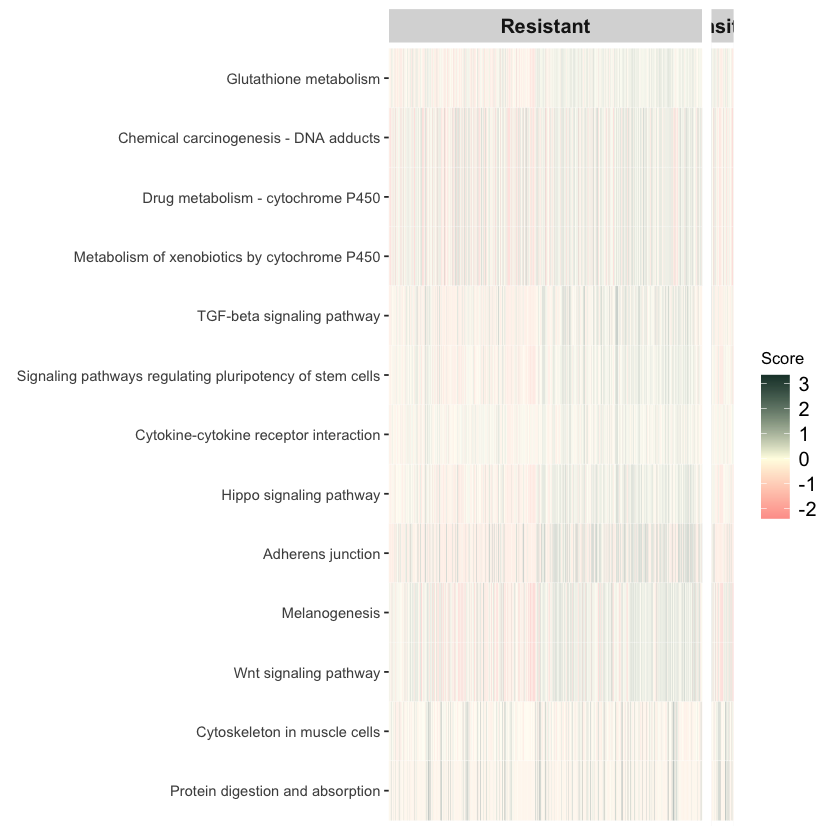

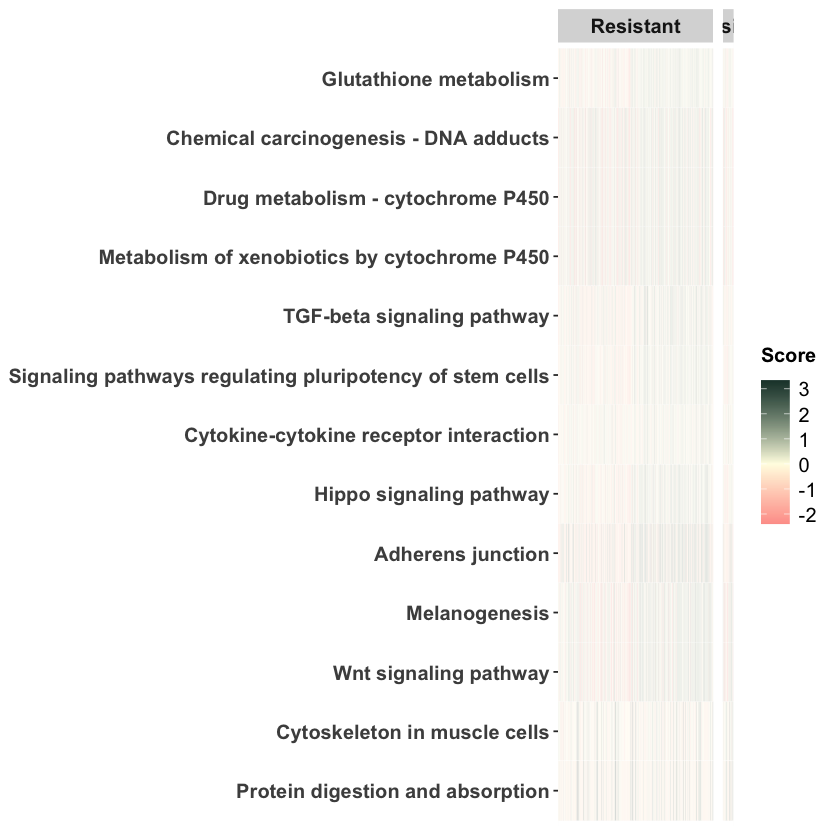

In [16]:
# plot heatmap and assign it to scores_figure

score_matrix_filtered <- score_terms(
  enrichment_table = save_filtered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE,
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", # default = "green"
  mid = "#fffde4", # default = "black"
  high = "#1f4037" # default = "red"
)

scores_figure <- plot_scores(
    score_matrix_filtered,
    cases = cases,
    label_samples = FALSE,
    case_title = "Resistant",  
    control_title = "Sensitive", 
    low = "#f7797d", 
    mid = "#fffde4",  
    high = "#1f4037"  
) +
ggplot2::theme(
    legend.title = ggplot2::element_text(
        size = 12, face = "bold", margin = ggplot2::margin(b = 10)  
    ),
    axis.title.y = ggplot2::element_blank(),          
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"), 
    legend.text = ggplot2::element_text(size = 12),                 
    strip.text = ggplot2::element_text(size = 18, face = "bold")    
)

ggplot2::ggsave(
    paste(pathfindR_dir, "KEGG_Gemcitabine/Scores per Sample Plot (GDSC, selected terms).pdf", sep = "/"),
    scores_figure,
    width = 25,  
    height = 5   
)

scores_figure

In [17]:
# plot term gene heatmap

term_plot <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               num_terms = nrow(score_matrix)) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Heatmap (# of genes)(GDSC).pdf",sep="/"),
  term_plot,             
  width = 15,                                    
  height = 7                                    
) 

In [18]:
# plot term gene heatmap (sorted by p-value)

term_plot_pvalue <- term_gene_heatmap(output_df, 
                               num_terms = nrow(score_matrix),
                               use_description = TRUE,
                               sort_terms_by_p = TRUE) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Heatmap (p-values)(GDSC).pdf",sep="/"),
  term_plot_pvalue,             
  width = 15,                                    
  height = 7                                    
) 

In [19]:
# plot term gene heatmap with top 10 terms

term_plot_top10 <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               num_terms = 10) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Heatmap (# of genes, top 10)(GDSC).pdf",sep="/"),
  term_plot_top10,             
  width = 15,                                    
  height = 5                                   
) 

In [20]:
# plot term gene heatmap with top 10 terms

term_plot_top10 <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               sort_terms_by_p = TRUE,
                               num_terms = 10) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Heatmap (p-values, top 10)(GDSC).pdf",sep="/"),
  term_plot_top10,             
  width = 15,                                    
  height = 5                                    
) 

In [21]:
# plot term gene heatmap with selected terms

term_plot_filtered <- term_gene_heatmap(save_filtered, 
                                        use_description = TRUE,
                                        num_terms = nrow(score_matrix_filtered)) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Heatmap (# of genes)(GDSC, selected terms).pdf",sep="/"),
  term_plot_filtered,             
  width = 15,                                    
  height = 7                                    
) 

In [22]:
# plot term gene heatmap with selected terms (sorted by p-values)

term_plot_filtered_pvalue <- term_gene_heatmap(save_filtered, 
                                               use_description = TRUE,
                                               sort_terms_by_p = TRUE,
                                               num_terms = nrow(score_matrix_filtered)) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Heatmap (p-values)(GDSC, selected terms).pdf",sep="/"),
  term_plot_filtered_pvalue,             
  width = 15,                                    
  height = 7                                    
) 

In [23]:
# plot term gene graph with top 5 terms

p <- term_gene_graph(output_df, 
                     use_description = TRUE,
                     num_terms = 5) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Graph (n = 5)(GDSC).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [24]:
# plot term gene graph ith top 10 terms

p <- term_gene_graph(output_df, 
                     use_description = TRUE,
                     num_terms = 10) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Graph (n = 10)(GDSC).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [25]:
# plot term gene graph with selected terms (top 5 terms)

p <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = 5) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Graph (n = 5)(GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [26]:
# plot term gene graph with selected terms (top 10 terms)

p <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = 10) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Graph (n = 10)(GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [27]:
# plot term gene graph with selected terms 

term_gene_figure <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = nrow(save_filtered)) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Term Gene Graph (GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 20,                                    
  height = 11                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [28]:
# upset plot with top 10 terms

upset_plot <- UpSet_plot(output_df,
                         num_terms = 10) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Upset plot\n") +
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Upset Plot (n = 10)(GDSC).pdf",sep="/"),
  upset_plot,             
  width = 18,                                    
  height = 5                                    
) 


In [29]:
# upset plot with selected terms (top 10 terms)

upset_plot <- UpSet_plot(save_filtered,
                         num_terms = 10) +
ggplot2::ggtitle("DNA replication inhibitors (Gemcitabine)\nKEGG Pathways, Upset plot\n") +
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG_Gemcitabine/Upset Plot (n = 10)(GDSC, selected terms).pdf",sep="/"),
  upset_plot,             
  width = 18,                                    
  height = 5                                    
) 


In [30]:
# read GDSC cell line details

gdsc_sample_info <- read_excel(paste0(gdsc_dir, "/GDSC_Cell_Lines_Details.xlsx"))
gdsc_sample_info <- gdsc_sample_info[,c("Sample Name",
                                        "COSMIC identifier",
                                        "GDSC\r\nTissue descriptor 1")]
head(gdsc_sample_info)

Sample Name,COSMIC identifier,GDSC Tissue descriptor 1
<chr>,<dbl>,<chr>
A253,906794,aero_dig_tract
BB30-HNC,753531,aero_dig_tract
BB49-HNC,753532,aero_dig_tract
BHY,753535,aero_dig_tract
BICR10,1290724,aero_dig_tract
BICR22,1240121,aero_dig_tract


In [31]:
# merge GDSC cell line detail table with GDSC experiment matrix table

gdsc_experiment_mat <- t(gdsc_experiment_matrix)
gdsc_experiment_mat <- cbind(rownames(gdsc_experiment_mat),gdsc_experiment_mat)
colnames(gdsc_experiment_mat)[1] <- "COSMIC identifier"

gdsc_experiment_mat_tissue <- merge(gdsc_sample_info,
                                    gdsc_experiment_mat,
                                    by= "COSMIC identifier")
head(gdsc_experiment_mat_tissue)

,COSMIC identifier,Sample Name,GDSC Tissue descriptor 1,ACTN1,ADA,ADM,ADORA2B,AEBP1,AHR,AIF1,⋯,TUBB2B,SERINC2,AMIGO2,TBC1D10C,NRROS,TRNP1,IER5L,MIR17HG,GPX8,TSTD1
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,683665,MC-CAR,myeloma,-1.32067119578754,1.4366810172981,-1.35261677480684,-1.43983243533375,0.748239562165711,-0.758333894521698,1.88107381428415,⋯,-0.739531258193347,0.533177678695854,-1.30134768878068,2.41079505192691,2.0528630383186,-1.16040258045982,-1.48799379903767,0.302855282421376,-1.40608036129727,0.429536750753397
2,683667,PFSK-1,nervous_system,-0.393652444116975,0.964925500402852,-0.590050048839158,0.360853799002762,1.6611710693668,-0.763440033790151,-0.14253898881881,⋯,-0.533978452011763,1.3938444071982,-0.376906733077427,-0.0966566286083775,0.321044679570113,-0.677218773952572,0.0693658990145518,-1.02305333971859,0.672949469211017,-1.60560018772296
3,684052,A673,soft_tissue,0.167084501503202,0.678942670968474,-0.787479554084742,-0.656081027135807,1.12202951423544,-0.550526388201367,-0.255968889053175,⋯,1.31371201152387,-1.30341495045216,-0.568971088724495,-0.404976276951514,-0.539120930986954,-1.0652719191747,-1.08099094217445,-0.900235306279224,0.803629292757566,-1.60978557865365
4,684055,ES3,bone,-1.1038452262866,-0.0722572533106381,-1.11950681879136,-1.02385699993337,0.282148889380843,-1.0445013711902,1.17837294091243,⋯,1.63006070861982,0.562892360502154,-0.98313431501998,-0.467293630076887,-0.308751195374171,0.0597419903640416,-1.29952956238253,-0.643343506769452,0.681942627930971,-0.808930031297276
5,684057,ES5,bone,-1.26990038318732,0.564012775113484,-1.08596842095866,-0.0469790609896668,1.12686701848256,-0.952683105049508,0.970053211003016,⋯,1.44099962937408,-0.1171584763177,-1.05125309417583,-0.432690578622858,-0.439420340391963,1.29155696481109,-0.924148027465751,0.236403335112101,0.315107681652811,-1.6902469856077
6,684059,ES7,bone,-0.371793517964657,-0.0863264421063415,0.445046012465862,-0.756751456908886,1.54082597523846,-0.485287972821327,-0.415263052534369,⋯,1.45409941768693,-1.152882351803,-0.278944885841798,-0.351139782637541,-0.586328723950001,0.692595181951727,1.58262464395262,-0.60320728783523,0.623353462460017,-0.832859569522571


In [32]:
# find number of tissue types

sort(table(gdsc_experiment_mat_tissue["GDSC\r\nTissue descriptor 1"]),
     decreasing = TRUE)

GDSC
Tissue descriptor 1
       lung_NSCLC urogenital_system          leukemia    aero_dig_tract 
               86                76                64                62 
         lymphoma    nervous_system              skin         lung_SCLC 
               59                47                47                46 
           breast  digestive_system   large_intestine              bone 
               43                38                35                34 
    neuroblastoma          pancreas            kidney       soft_tissue 
               25                25                17                16 
             lung           myeloma           thyroid 
               15                13                13 

In [33]:
# merge GDSC sample info with GDSC cases 

gdsc_cases_info <- merge(gdsc_sample_info,
                         gdsc_cases_data,
                         by.x = "COSMIC identifier",
                         by.y = "Sample")

head(gdsc_cases_info)

,COSMIC identifier,Sample Name,GDSC Tissue descriptor 1,Response
,<dbl>,<chr>,<chr>,<int>
1,683665,MC-CAR,myeloma,0
2,683667,PFSK-1,nervous_system,0
3,684052,A673,soft_tissue,0
4,684055,ES3,bone,0
5,684057,ES5,bone,0
6,684059,ES7,bone,0


In [34]:
# gemcitabine sensitive cell lines as to their tissue descriptor in GDSC

sen <- sort(table(gdsc_cases_info[gdsc_cases_info["Response"] == 1,3]),
       decreasing = TRUE)
sen


             bone          lymphoma              skin urogenital_system 
                7                 6                 5                 5 
   aero_dig_tract            kidney          leukemia        lung_NSCLC 
                4                 4                 4                 4 
      soft_tissue    nervous_system  digestive_system   large_intestine 
                4                 2                 1                 1 
        lung_SCLC          pancreas           thyroid 
                1                 1                 1 

In [35]:
# gemcitabine resistant cell lines as to their tissue descriptor in GDSC

res<- sort(table(gdsc_cases_info[gdsc_cases_info["Response"] == 0,3]),
      decreasing = TRUE)
res


       lung_NSCLC urogenital_system          leukemia    aero_dig_tract 
               82                71                60                58 
         lymphoma         lung_SCLC    nervous_system            breast 
               53                45                45                43 
             skin  digestive_system   large_intestine              bone 
               42                37                34                27 
    neuroblastoma          pancreas              lung            kidney 
               25                24                15                13 
          myeloma       soft_tissue           thyroid 
               13                12                12 

In [36]:
# Count table of resistant and sensitive cell lines to gemcitabine in GDSC

aligned_vector2 <- sen[match(names(res), names(sen))]
combined_df <- cbind(res, aligned_vector2)
colnames(combined_df) <- c("Resistant","Sensitive")
combined_df <- as.data.frame(combined_df)
combined_df <- combined_df[order(combined_df$Sensitive, decreasing = TRUE),]
combined_df

,Resistant,Sensitive
,<int>,<int>
bone,27,7
lymphoma,53,6
urogenital_system,71,5
skin,42,5
lung_NSCLC,82,4
leukemia,60,4
aero_dig_tract,58,4
kidney,13,4
soft_tissue,12,4


In [37]:
paste("There are",sum(combined_df$Resistant),"gemcitabine resistant cell lines in GDSC")
paste("There are",sum(na.omit(combined_df$Sensitive)),"gemcitabine sensitive cell lines in GDSC")
paste("Sen/(Sen + Res):", round(sum(na.omit(combined_df$Sensitive))/(sum(na.omit(combined_df$Sensitive)) +sum(combined_df$Resistant)),2))

[1] "There are 711 gemcitabine resistant cell lines in GDSC"

[1] "There are 50 gemcitabine sensitive cell lines in GDSC"

[1] "Sen/(Sen + Res): 0.07"